In [435]:
# # Importing the necessarty modules
# import pandas as pd # Handles DataFrame
# import matplotlib.pyplot as plt #Plot Graphs
# import seaborn as sns # Plotting Graphs
# sns.set_theme()
# import numpy as np


# # import func that allows us to do test-split
# from sklearn.model_selection import train_test_split
# from sklearn.impute import KNNImputer

# from imblearn.over_sampling import SMOTE
# from imblearn.over_sampling import RandomOverSampler
# from sklearn.datasets import make_classification
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.dummy import DummyClassifier
# from sklearn.pipeline import Pipeline
# from imblearn.pipeline import Pipeline as IMBPipeline
# from sklearn.compose import ColumnTransformer

# # Models
# from sklearn.dummy import DummyClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.linear_model import Perceptron
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import RidgeClassifier
# from sklearn.linear_model import RidgeClassifierCV
# from sklearn.linear_model import SGDClassifier
# from sklearn.svm import SVC


# # import func to perform model evaluation
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,RocCurveDisplay
# from sklearn.model_selection import (
#     train_test_split,
#     cross_validate,
#     cross_val_score,
#     GridSearchCV,
#     RandomizedSearchCV,
#     cross_val_predict,
#     learning_curve,
#     StratifiedKFold,
# )

In [436]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import itertools
from warnings import filterwarnings
import scipy.stats as ss

# SKLEARN Libraries
# Preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import TransformedTargetRegressor


# Model Selection
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

# Models
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.dummy import DummyRegressor

# Pickle Library = Saving Models
import pickle

In [437]:
#Loading the data for Classification and analysing it
df= pd.read_csv('./CA1-Regression-Dataset.csv')
df.head()

,ID,Age,Gender,BMI,Smoker,Region,Cost ($)
0,1,19,female,27.900,yes,southwest,16884.92400
1,2,18,male,33.770,no,southeast,1725.55230
2,3,28,male,33.000,no,southeast,4449.46200
3,4,33,male,22.705,no,northwest,21984.47061
4,5,32,male,28.880,no,northwest,3866.85520


<hr></hr>

### Exploratry Data Analysis
<hr></hr>

Now we will further investigate and analysis our dataset through methods to retrieve information and visualisations. We aim to look for any relationship between the features and target in order to know what will help predict the target which is the overall goal. A better understanding will assit us in feature engineering our dataset as


Before getting started, in order to prevent orignal dataset from mutating we will need to create a copy of the orginal dataset.


In [438]:
# Creating new dataset
df_eda = df.copy()

### Descriptive Analysis
Getting descriptive information on our dataset to gain a better understanding.

In [439]:
df_eda.shape

(1338, 7)

In [440]:
df_eda.isna().sum()

ID          0
Age         0
Gender      0
BMI         0
Smoker      0
Region      0
Cost ($)    0
dtype: int64

In [441]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1338 non-null   int64  
 1   Age       1338 non-null   int64  
 2   Gender    1338 non-null   object 
 3   BMI       1338 non-null   float64
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Cost ($)  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [442]:
df_eda.describe()

,ID,Age,BMI,Cost ($)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,30.663397,13270.422265
std,386.391641,14.049960,6.098187,12110.011237
min,1.000000,18.000000,15.960000,1121.873900
25%,335.250000,27.000000,26.296250,4740.287150
50%,669.500000,39.000000,30.400000,9382.033000
75%,1003.750000,51.000000,34.693750,16639.912515
max,1338.000000,64.000000,53.130000,63770.428010


In [443]:
# For categorical data
print("Unique values for Region:",df_eda['Region'].unique())

print('Unique values for Smoker:' ,df_eda['Smoker'].unique())

print("Unique values for Gender:", df_eda['Gender'].unique())

Unique values for Region: ['southwest' 'southeast' 'northwest' 'northeast']
Unique values for Smoker: ['yes' 'no']
Unique values for Gender: ['female' 'male']


<u>Summary</u>

The dataset provided has 7 coulmns and 1338 data points, 4 of the columns including the target(Cost) are numerical datatype while the other 3 are categorical datatype. We can also conclude that there are no missing values in the dataset.

-Numeric Datatypes:
<ul>
<li><b>ID:</b> Identifier for the patient; Range: 0 - 1337</li>
<li><b>Age:</b> Age of the patient; Range: 18 - 64</li>
<li><b>BMI:</b> Body Mass Index of the patient; Range: 15.96 - 53.13</li>
<li><b>Cost ($)</b> Cost of hospital treatment; Range: 1121.87 - 63770.43</li>
</ul>

-Catergorical Datatypes:
<ul>
<li><b>Gender:</b> Sex of the patient; 'female' or 'male'</li>
<li><b>Smoker:</b> Indicator if patient smokes; 'yes' or 'no'</li>
<li><b>Region:</b> Region of the hopsital; 'southwest', 'southeast', 'northwest', or 'northeast'</li>
</ul>
<hr>

### Univariative Analysis
Analysing the distribution of our features

In [444]:
# Creating functions to plot our features against Cost

# Bar Plot for Categorical Datatypes
def createBoxPlot(col, y='Cost ($)', data=df_eda):
    fig, ax = plt.subplots(figsize=(12, 10))
    sns.boxplot(x=col, y=y, palette='bright', data=data)
    plt.title(f'Relationship of {col} against Cost ($)')
    plt.ylabel("Cost ($)")
    plt.xlabel(f'{col}')
    
# Scatter Plot for Numeric Datatypes
def createRegPlot(col, y='Cost ($)', data=df_eda):
    fig, ax = plt.subplots(figsize=(15, 10))
    sns.regplot(x=col, y=y, data=data,
                scatter_kws={"color": 'blue', 'alpha': 0.5},
                line_kws={"color":'red'})
    plt.title(f'Relationship of {col} against Cost ($)')
    plt.xlabel(f'{col}')
    plt.ylabel("Cost ($)")


-Numeric Datatype

<u>ID:</u><br>As expected there is no relationship between the ID and Cost as ID is only an indetifier for the patient. Regression line is straight and distribuition seems even throughout the graph. 

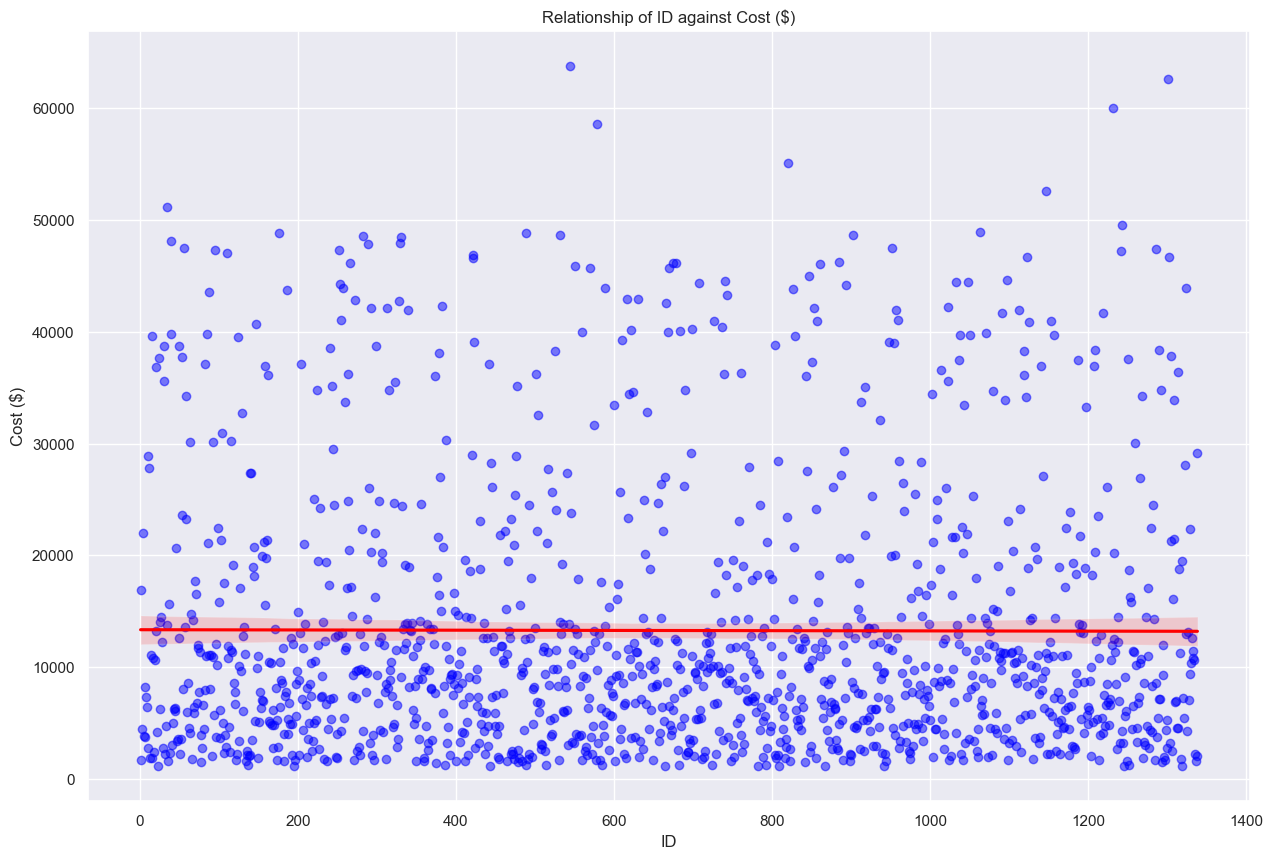

In [445]:
createRegPlot("ID")

<u>Age:</u><br>
Regression line has a positive gradient, suggesting postive correlation between Age and Cost, where as the age of the patient increases, the Cost increases.

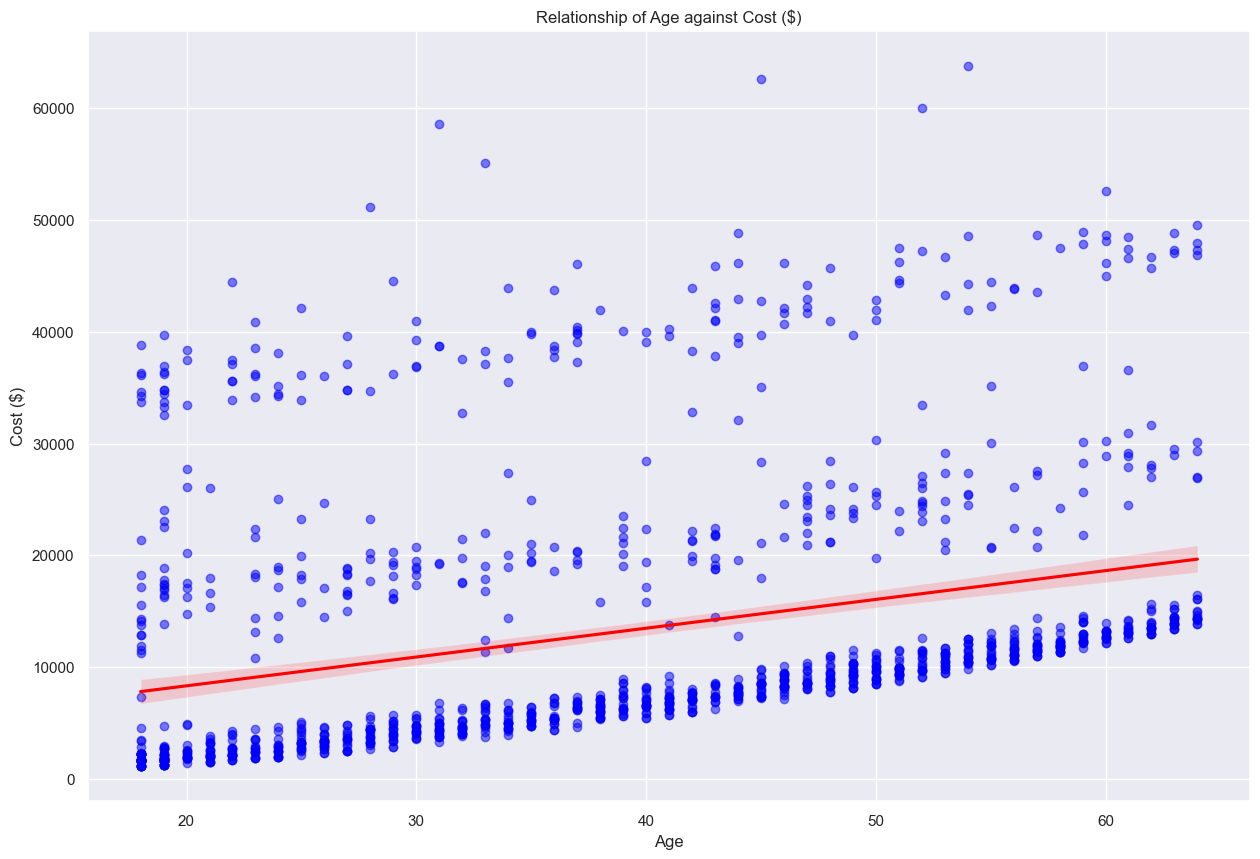

In [446]:
createRegPlot("Age")

<u>BMI:</u><br>
Regression line has a positive gradient but width of cofidednce interval increasing towards the end, suggesting a positive correlation between BMI and Cost. However, there is more uncertainty as BMI increases.

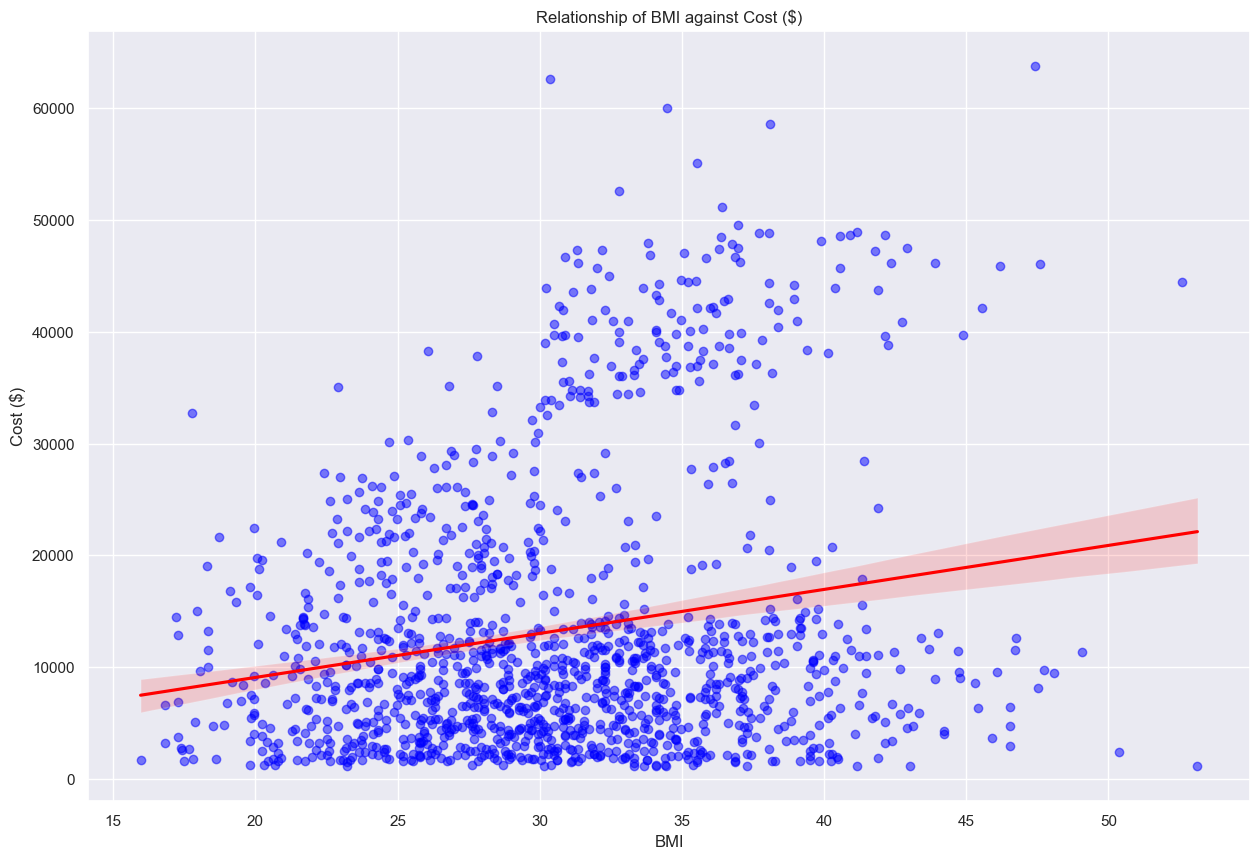

In [447]:
createRegPlot("BMI")

<u>Gender:</u><br>
It is difficult to determine if there is a correlation as the median Cost for both gender is around $10,000, however, the IQR for male is larger compared to female where the estimated IQR for male and female is around $15,000 and $10,000 respectively, suggesting there might be a slight correlation. We can also see that the graphs is righ-skewed as the tails are longer on the right and that there are many outliers.

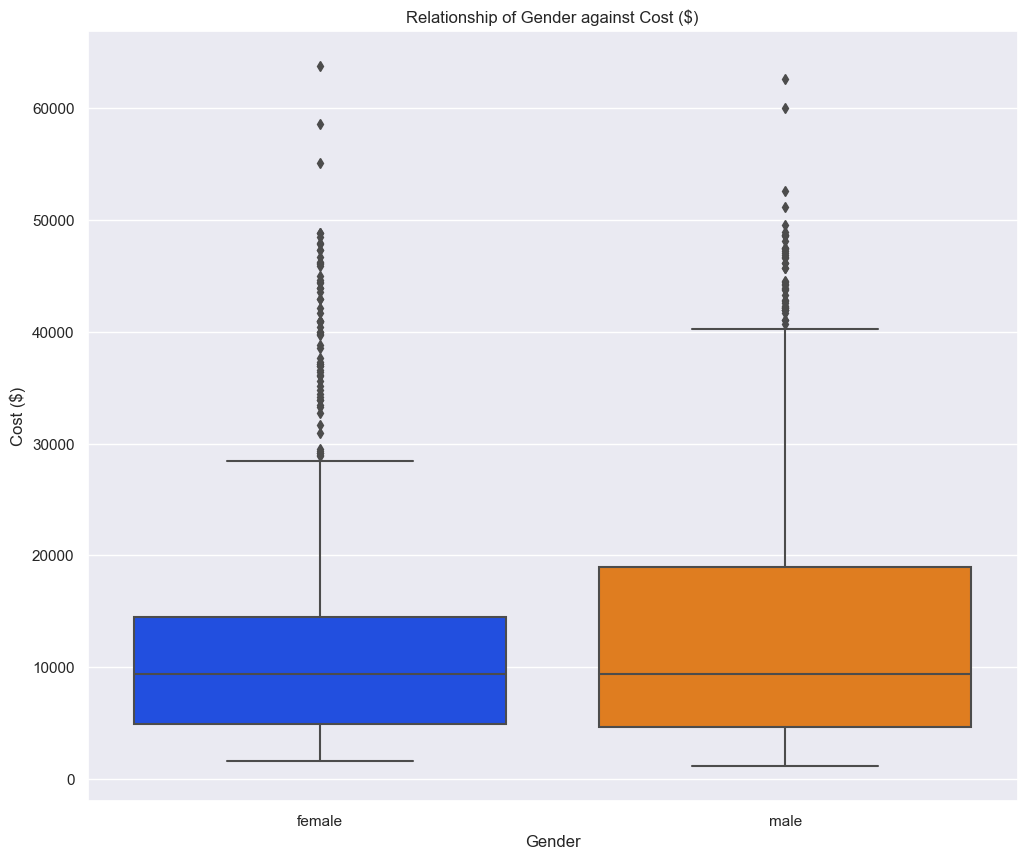

In [448]:
createBoxPlot('Gender')

<u>Smoker:</u><br>
There is a clear correlation between smoking and cost. Patients the smoke has a median cost of around $35,000 which is significantly higher compared to patients who do not smoke with a median of around $7,000. We can also observe that the IQR is much larger for a smoker and that the maximum cost of non-smokers is around $37,500 which is close to the median of smoker while the maximum cost for smoker is greater than $60,000

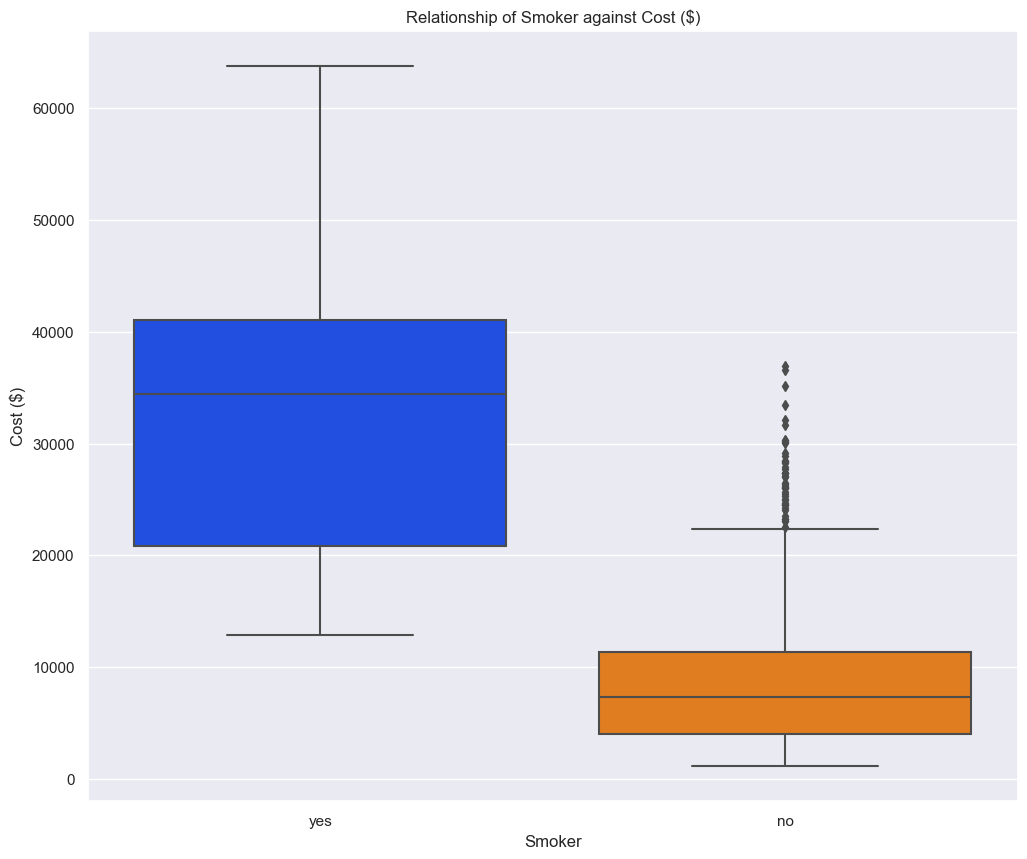

In [449]:
createBoxPlot("Smoker")

<u>Region:</u><br>
It is hard to determine whether there is any correlation between Region and Cost as the median is almost the same for each region. However, the IQR for regions in the East is larger compared to those in the West, this is espcially true of South-West with the largest IQR and maximum value.

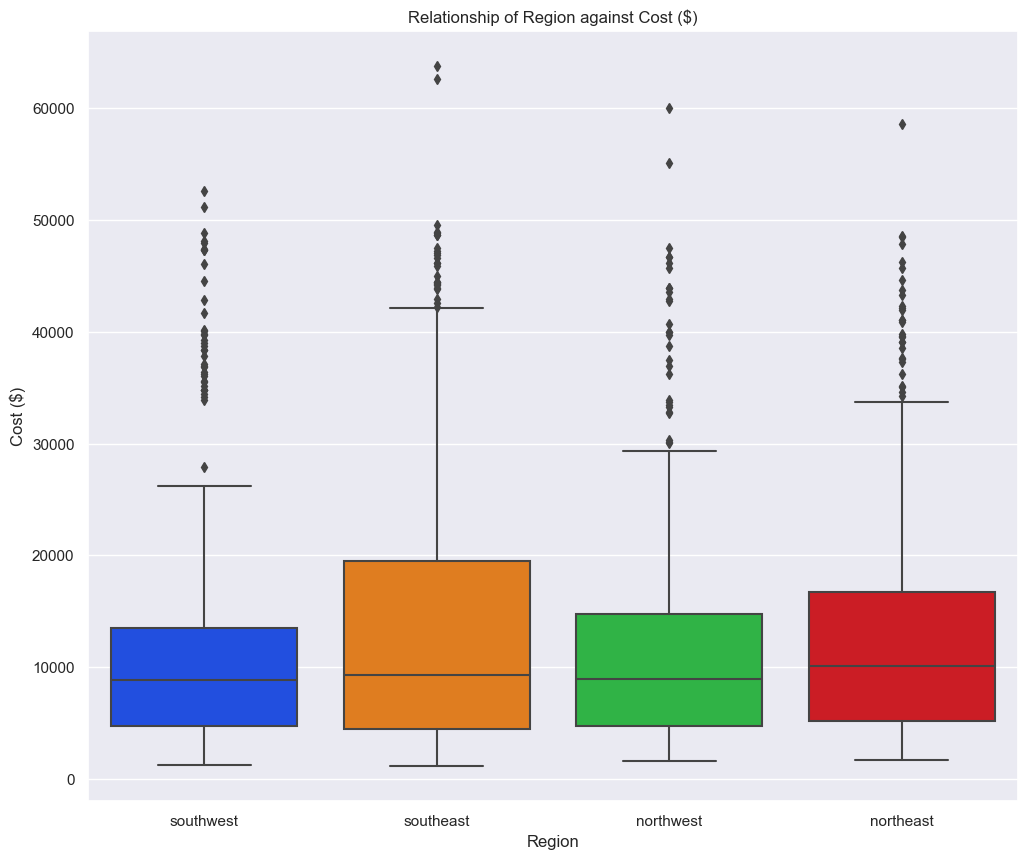

In [450]:
createBoxPlot("Region")

<u>Target: Cost ($)</u><br>
Looking at the distribution we can see that the target distribution is right-skewed

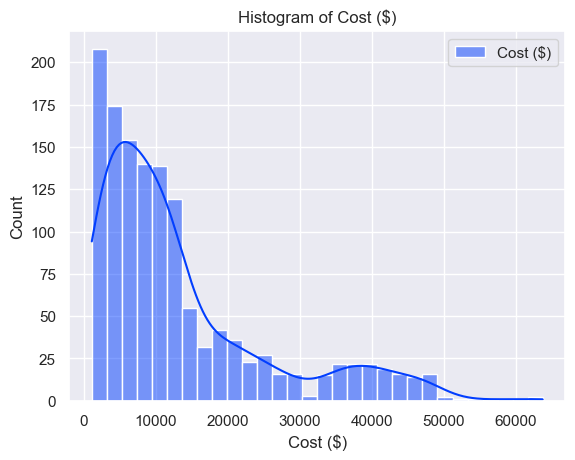

In [451]:
# Plotting the histogram of cost to see the distribution
sns.histplot(df[['Cost ($)']], kde = True, palette='bright')
plt.title("Histogram of Cost ($)")
plt.xlabel("Cost ($)")
plt.show()

<u>Summary</u>

<b>Numerical Datatype</b>:<br>
Besides ID, there seems to be a postitive correlation between Age and Cost as well as BMI and Cost.

<b>Categorical Datatype</b>:<br>
There is a clear corelation between smoker and cost but it is hard to determine whether there is any corelation between Gender or Region with Cost.

<b>Target</b>:<br>
Our target(Cost) distribution is right-skewed and outliers are those with very expansive cost.<hr>


### Bivirative Analysis
Finding correlation between the features itself

Before we can plot a heatmap or pairplot, we need to deal with the categorical data first. This can be done by creating dummy variable to convert our categorical values into binary values. 

For now we will use the simplest way to create our dummy for the sake of visualization.

In [452]:
df_dummy = pd.get_dummies(df_eda, drop_first=True)

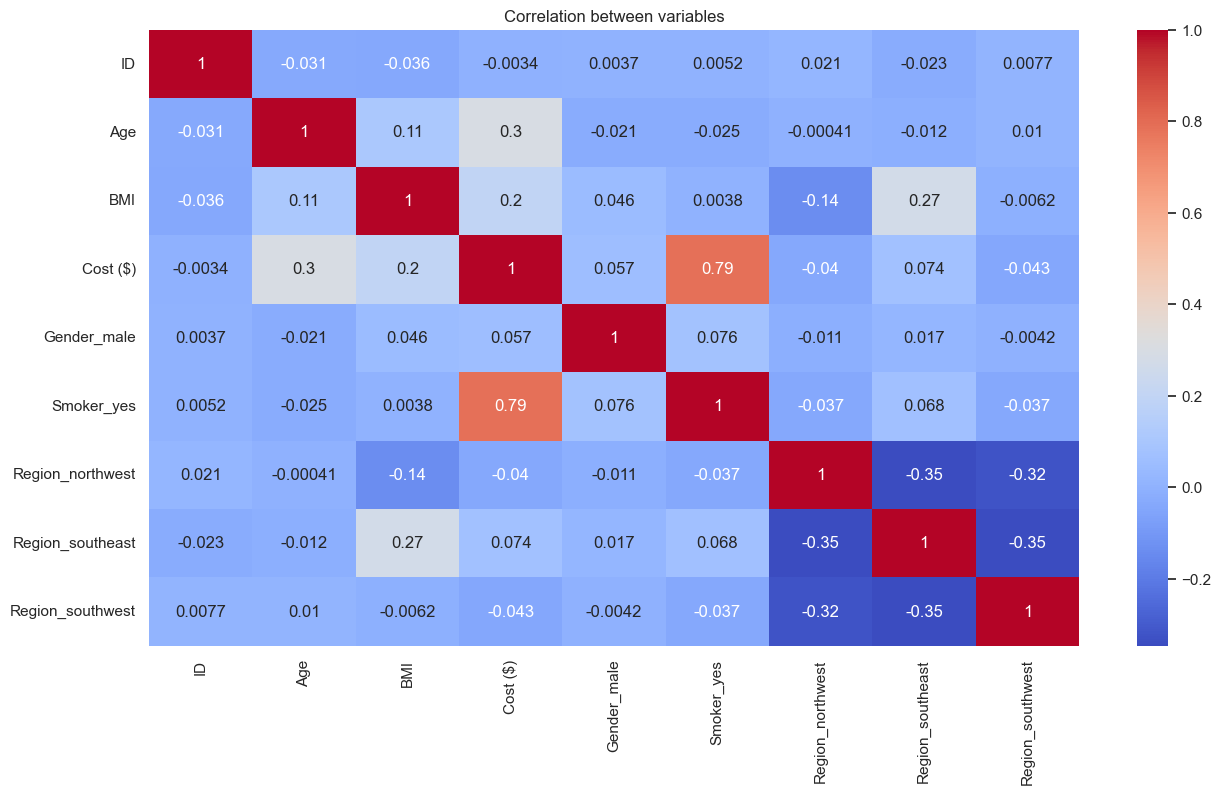

In [453]:
plt.figure(figsize=(15, 8))

# Plot
sns.heatmap(df_dummy.corr(), annot=True, cmap='coolwarm').set(title="Correlation between variables")

# Show Plot
plt.show()


<u>Observation</u>

<b>Correaltion with target</b>:<br>
As we discovered earlier on, Age and BMI has a moderate correlation with Cost of 0.3 and 0.2 respectively while Smoker has strong correlation of 0.79 and out of the regions, Southeast has the highest correlation 0.074. The other features have little correlation with Cost.

<b>Correlation between features</b>:</br>
Most of the features have very less correlation with one another, however, we can see that Southeast region has a moderate correlation with BMI of 0.27<hr>

Now, we will plot a pariplot to see if there are any trends between the features itself. Since smokers have the strongest correlation, we will using it as our hue so we can differentiate the patients that smoke and it could help us see a more obvious trend.

c:\Users\yongj\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


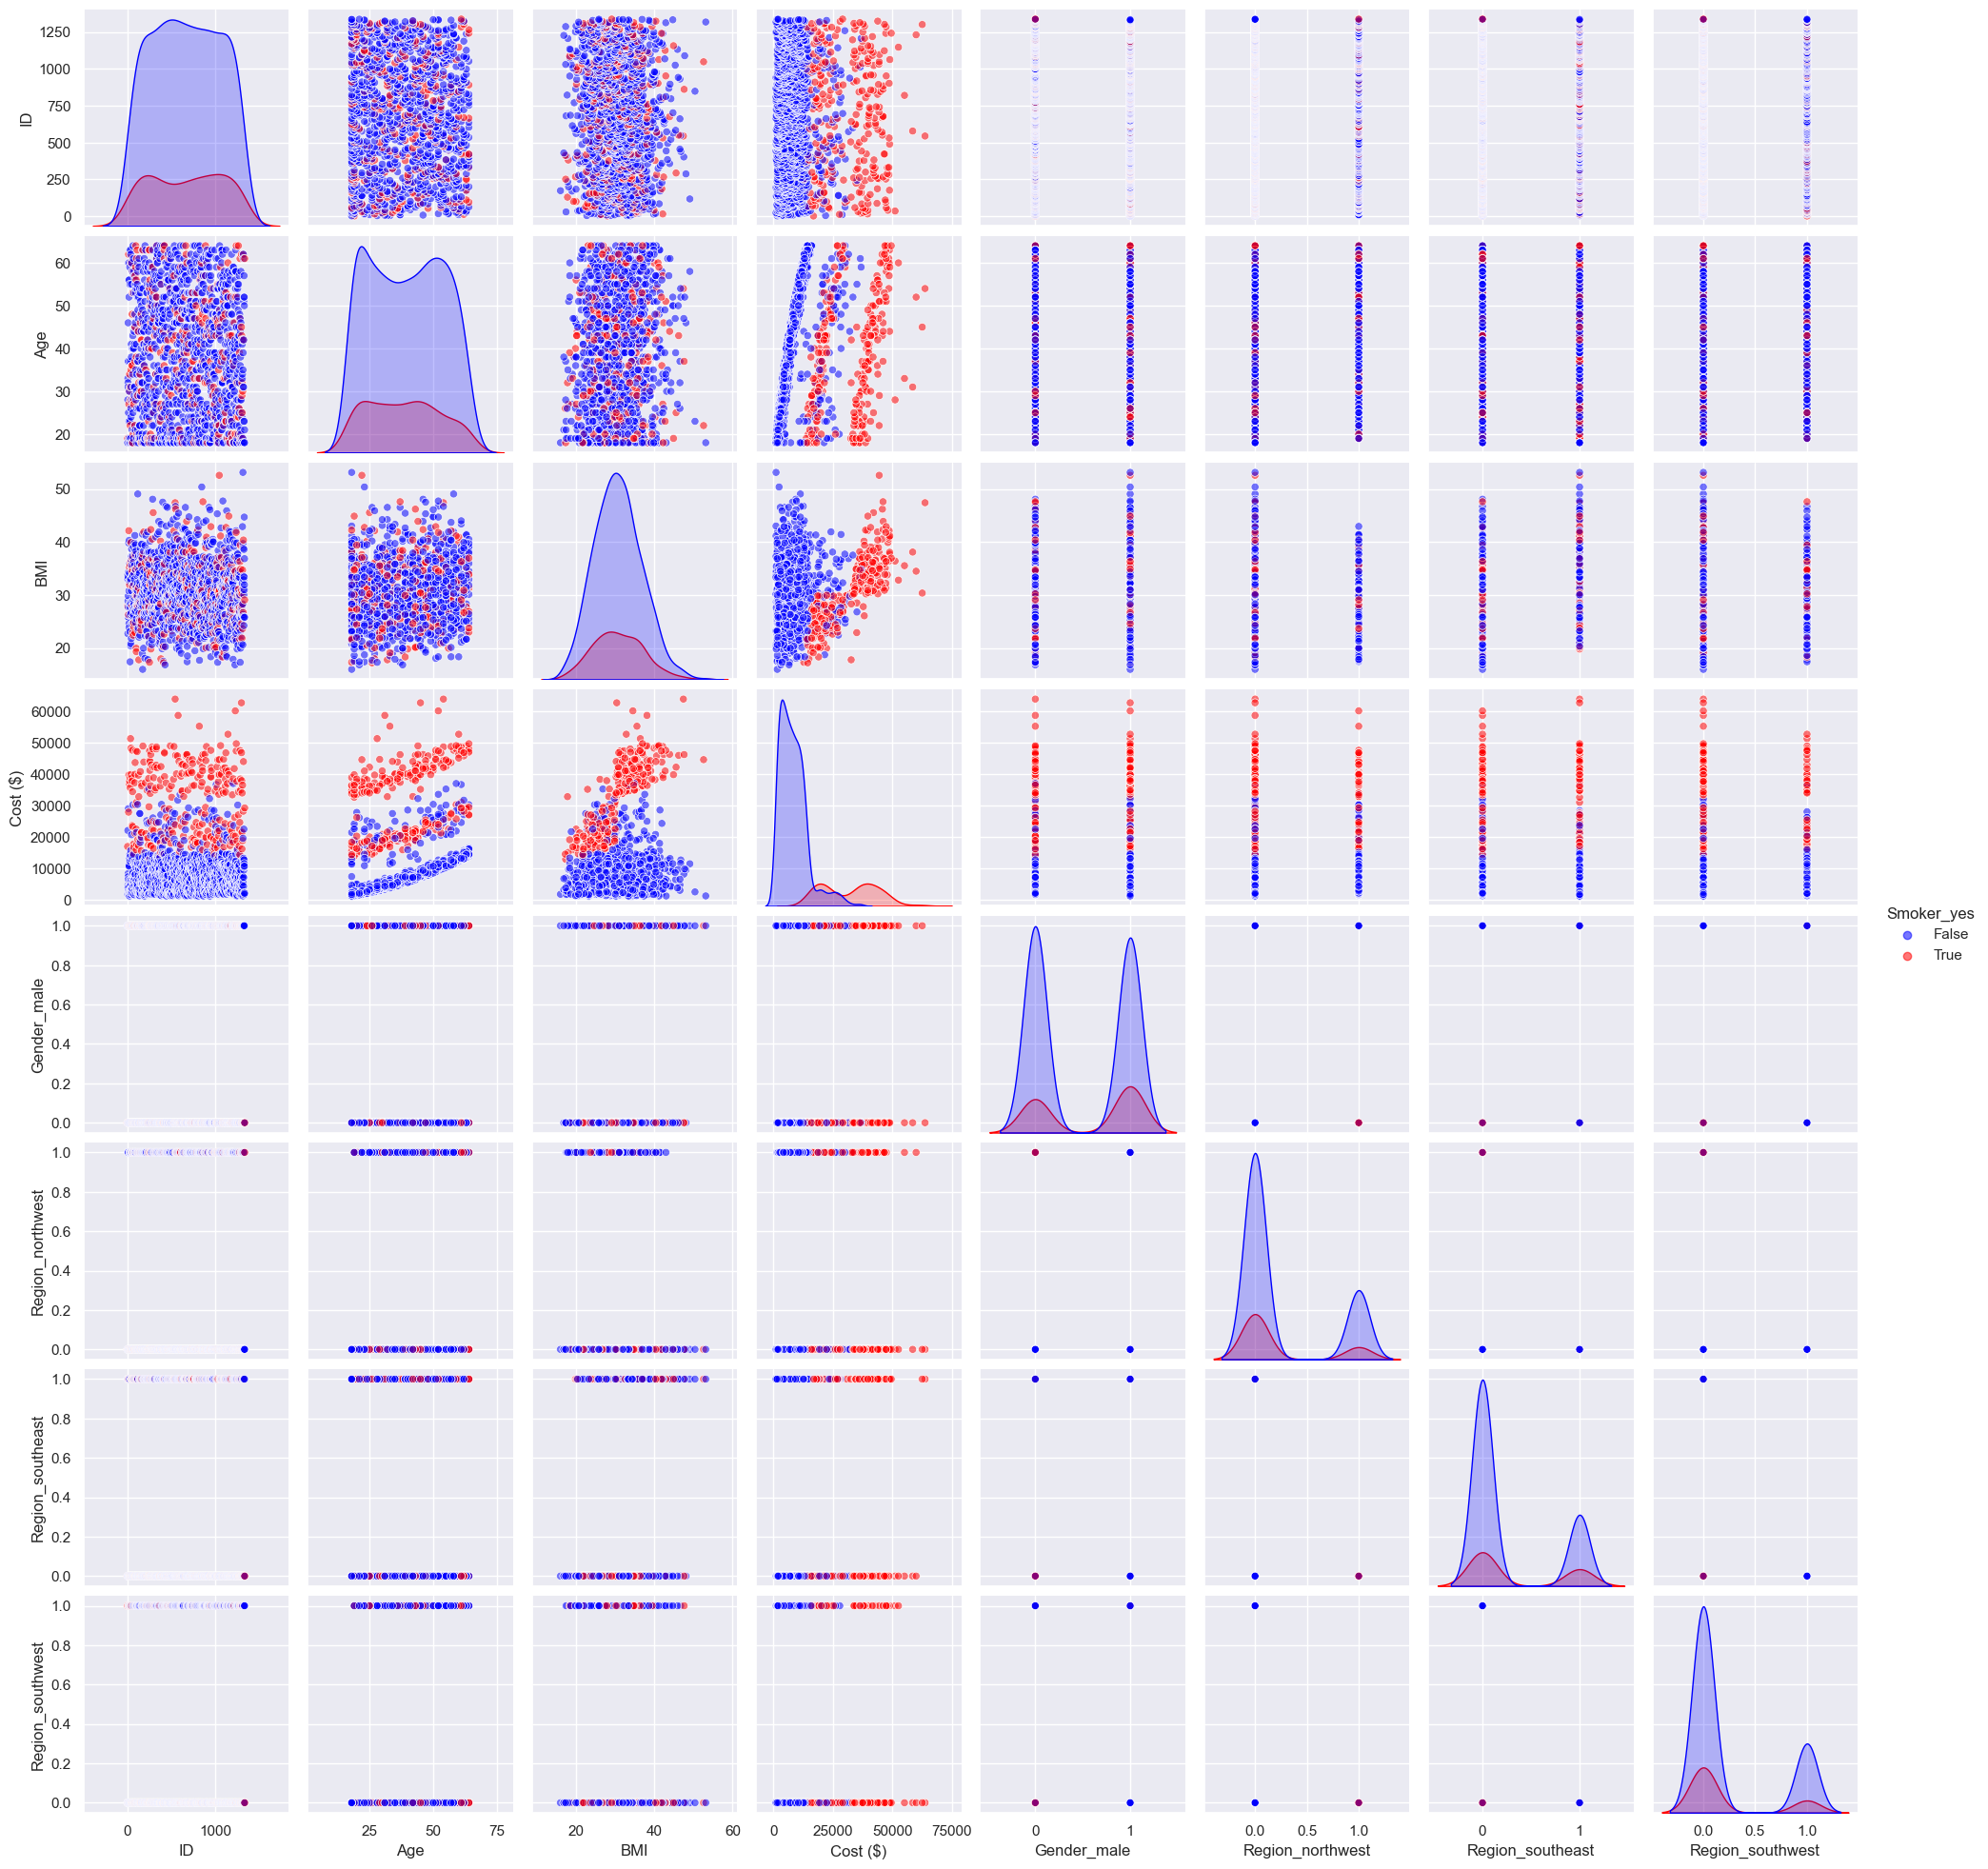

In [454]:
# Plot
sns.pairplot(df_dummy, hue='Smoker_yes', palette=["#0000ff88", "#ff000088" ])

# Show Plot
plt.show()


<u>Observation</u>
<ul>
    <li>An obvious trend we can observe is that if a person smoke, the probabilty that cost of health care is more expansive compared to a non-smoker is high.</li>
    <li>Another trend we can observe is that, if as the age increase, the cost of healthcare increase, despite whether the patient is a smoker</li>
    <li>There seems to be a correlation for BMI and Smoker, where if the patient is a smoker with BMI < 30, the Cost ranges mostly from $15,000 to $30,000. While, if BMI > 30, the Cost ranges mostly from $30,000 to $50,000</li>
    <li>We can also see that the scale of BMI is generally higher is the southast region</li>
    <li>Other then that, it is hard to determine any other correlation between the other features.</li>
</ul>



<hr></hr>

## Data Preperation
<hr>

Before training our model we will have to prepare our data by cleaning and manipulating the dataset, so that our model can work with high quality data

Firstly, we will split our data into features and the target

In [455]:
X, y = df.drop(df[['Cost ($)']], axis=1), df[['Cost ($)']]

print("Row x Col for X:",X.shape)

print("Row x Col for y:", y.shape)

Row x Col for X: (1338, 6)
Row x Col for y: (1338, 1)


### Spliting Data Points
In order to evaluate our model after training it, we wil need a testing set that it has not seen. Therefore, we will split our data set into train and test set by 80-20.

In [456]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=69)

# Creating a copy to visualise our feature engineering and data preprocessing without affecting our training dataset
X_training = X_train.copy()


<hr> 

## Feature Engineering and Data Preprocessing

From our EDA we can see that there are several things we need to work on. Since there are no missing values there is no need for imputation, however we will need to:
<ul>
    <li>Drop redudant Columns</li>
    <li>Create dummy variables to convert our catergorical data to beinary values</li>

Since ID is just an identifier and has no affect on the Cost of healthcare we will be dropping it as it is redundent in training our model.

In [457]:
X_training = X_training.drop(X_training[['ID']], axis=1)

For our categorical data, we will be using One Hot Encoder to create our dummy variables for Gender, Smoker and Region.


We will also be creating new features to help better train our model the Columns we are creating are BMIGrp and AgeGrp.<br>
According to BMI Index, we will be putting BMI into their BMI groups and also be classifiying the Age group for different age.


In [459]:
def bmiGroup(df_input):
    df_input["BMIGrp"] = df_input['BMI'].apply(lambda x: 'underweight' if x < 18.5 else
                                            "healthy" if x < 25 else 
                                            "overweight" if x<30 else 
                                            "obese")
    return df_input

def ageGroup(df_input):
    df_input["AgeGrp"] = df_input['Age'].apply(lambda x: 'youngadult' if x < 30 else
                                            "middleAge" if x < 45 else  
                                            "oldAged")
    return df_input

X_training = bmiGroup(ageGroup(X_training))

In [460]:
enc = OneHotEncoder(drop='first')
cols = [
    'Gender',
    'Smoker',
    'BMIGrp',
    'AgeGrp'
]

for col in cols:
    enc.fit(X_training[[col]])

    df_encoded = pd.DataFrame(enc.transform(X_training[[col]]).toarray(), columns=enc.get_feature_names_out([col]), index=X_training.index)

    X_training = pd.concat(
        [X_training,
        df_encoded],
        axis=1
    )

X_training = X_training.drop(X_training[cols], axis = 1)

### Standardization

In [461]:
scaler = StandardScaler()

cols = [
    'Age',
    'BMI'
]

scaler.fit(X_training[cols])

X_training[cols] = scaler.transform(X_training[cols])

X_training.head()

,Age,BMI,Region,Gender_male,Smoker_yes,BMIGrp_obese,BMIGrp_overweight,BMIGrp_underweight,AgeGrp_oldAged,AgeGrp_youngadult
55,1.386808,1.032875,northwest,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1334,-1.507870,0.204099,northeast,0.0,0.0,1.0,0.0,0.0,0.0,1.0
852,0.518404,0.798316,northeast,0.0,1.0,1.0,0.0,0.0,1.0,0.0
738,-1.146036,0.172825,northeast,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1132,1.314441,1.580179,northeast,1.0,0.0,1.0,0.0,0.0,1.0,0.0


Since, our target is non-linear as discovered earlier in our EDA where we saw it is positively-skewed, the model trained will not be precise during prediction. Therefore we will using TransformTargetRegressor, it uses a logarithmic function is used to linearse the targets, allowing better prediction.

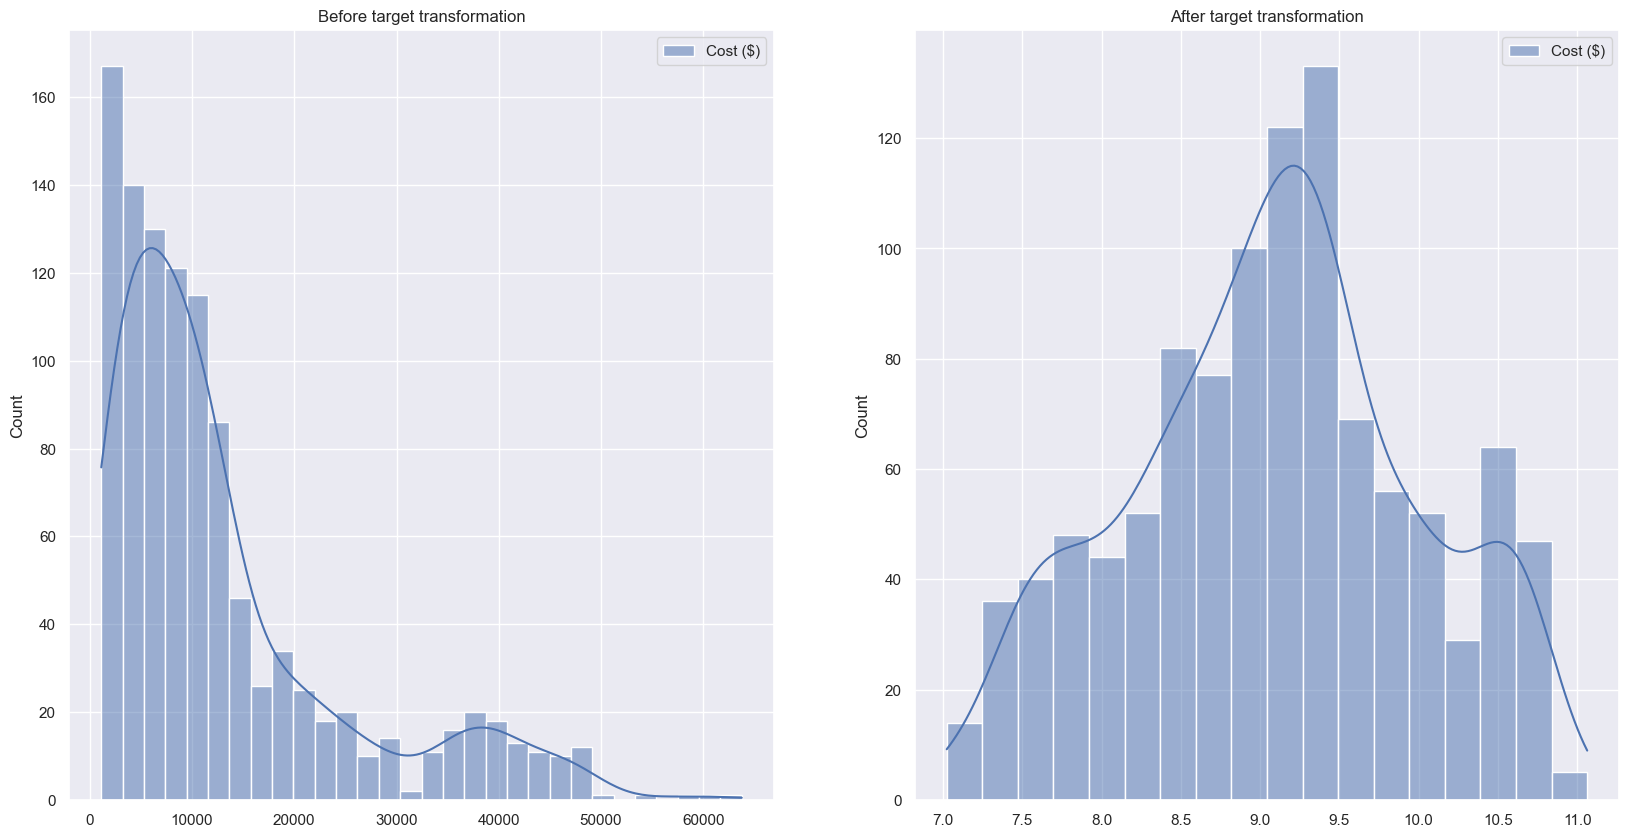

In [462]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(y_train, kde=True, ax=ax[0])
ax[0].set_title("Before target transformation")

sns.histplot(y_train.apply(np.log1p), kde=True, ax=ax[1])
ax[1].set_title("After target transformation")
plt.show()

<hr></hr>

### Creating the pipeline
We will now create a pipeline that helps us to prevent data leakage as imputation and encoding are applied separately to test and train the dataset. It also helps prevent data contamination while allowing us to see the steps taken more easily and reproduce the steps for different models.

In [463]:
scale_col = ['Age', "BMI"]
onehot_cols = ['Gender', "Smoker", 'AgeGrp', 'BMIGrp', 'Region']

onehot_transformer = Pipeline([('onehot', OneHotEncoder(drop='first'))])
numeric_transformer = Pipeline([('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', onehot_transformer, onehot_cols),
        ('scale', numeric_transformer, scale_col),
    ],
    remainder='passthrough',
)

steps =  [
    ('ageGrp', FunctionTransformer(ageGroup)),
    ('BMIGrp', FunctionTransformer(bmiGroup)),
    ('preprocessor', preprocessor),
    ('model'),
]

STEPS_LEN = len(steps) -1

X_col = pd.Series(
    
    Pipeline(steps=steps[:-1]).fit(X_train, y_train)[-1].get_feature_names_out()
).apply(lambda x: x.split("__")[1])

<hr>

### Setting up our scoring metrics

We will assess our model using three key evaluation metrics:

- **R Squared (r2):**
  R2 measures the proportion of the variance in the dependent variable that our regression model can explain. It provides an indication of how well the model captures the variability in the data.

- **Mean Absolute Percentage Error (MAPE):**
  MAPE calculates the average percentage difference between predicted and actual values. It is particularly useful for understanding the accuracy of the model in percentage terms.

- **Root Mean Squared Error (RMSE):**
  RMSE is the square root of the mean of the squared errors. It provides a measure of the average magnitude of the errors between predicted and actual values.

In [464]:
scoring_metrics = [
    'r2',
    'neg_mean_absolute_percentage_error',
    'neg_root_mean_squared_error',
]

<hr>

### Create Dummy Model for comparison

In [540]:
steps[STEPS_LEN] = ("model", DummyRegressor())
dummy = Pipeline(steps=steps)
dummy.fit(X_train, y_train)

# print(f"Baseline Accuracy Score :{dummy.score(X_test,y_test)}")
scores = cross_validate(
    dummy,
    X_train,
    y_train,
    cv=10,
    scoring=scoring_metrics,
    n_jobs=-1,
    return_train_score=True,
)

# Concatenate along rows (axis=0) to add the mean row
dummy_model_score = pd.concat([pd.DataFrame(scores),
                               pd.DataFrame([pd.DataFrame(scores).mean()],
                                             columns=pd.DataFrame(scores).columns, index=["Mean"])]
                               )

display(dummy_model_score.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]).apply(
        lambda x: ["background-color: green; color: white" if v else "" for v in x == x.max()])
    )


,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
0,0.039664,0.022235,-0.015716,0.000000,-1.256106,-1.459242,-12191.657712,-11757.628632
1,0.038135,0.023104,-0.003684,0.000000,-1.598565,-1.432961,-12655.832235,-11702.192151
2,0.040134,0.023104,-0.001714,0.000000,-1.218248,-1.479652,-11718.798958,-11809.959375
3,0.041768,0.021787,-0.000585,0.000000,-1.703174,-1.438072,-12263.704646,-11748.254510
4,0.040371,0.023095,-0.000408,0.000000,-1.324501,-1.471710,-11845.017904,-11795.876301
5,0.041229,0.020100,-0.021237,0.000000,-1.537557,-1.476196,-10690.777938,-11918.836419
6,0.040463,0.022101,-0.000167,0.000000,-1.612215,-1.440881,-12903.508203,-11671.833454
7,0.040182,0.021107,-0.006820,0.000000,-1.172321,-1.477367,-11600.836189,-11823.210586
8,0.040282,0.022289,-0.057997,0.000000,-1.835931,-1.457378,-10434.602053,-11945.705671
9,0.040205,0.020100,-0.000174,0.000000,-1.363064,-1.468784,-11570.614822,-11826.083301


<hr>

### Creating learning curve and scoring table for model

In [534]:
# Function to plot learning curves for a model
def plot_learning_curve(
    model,
    X,
    y,
    scoring,
    cv=StratifiedKFold(shuffle=True, random_state=42),
    train_sizes=np.linspace(0.1, 1.0, 10),
    ax=None,
):
    
    # Get model name
    try:
        model_name = type(model[-1].regressor).__name__
    except:
        try:
            model_name = type(model[-1]).__name__
        except:
            model_name = type(model).__name__
            
    # Create plot if ax is not passed
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model,
        X,
        y,
        cv=cv,
        n_jobs=-1,
        train_sizes=train_sizes,
        return_times=True,
        scoring=scoring,
    )
    
    # Calculate mean of scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot learning curve
    ax.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    ax.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    
    # Formatting
    ax.legend(loc="best")
    ax.set(
        ylim=(
            min(np.nanmin(train_scores), np.nanmin(test_scores)) - 0.01,
            max(np.nanmax(train_scores), np.nanmax(test_scores)) + 0.01,
        )
    )
    
    # Setting labels
    ax.set_title(f"Learning Curve of {model_name}")
    ax.set_ylabel(f"{scoring}")
    ax.set_xlabel("Train Sizes")
    return ax

In [466]:
# Initiate Regressors with default parameters
models = [
    ("AdaBoostRegressor", AdaBoostRegressor()),
    ("LinearRegression", LinearRegression()),
    ("DecisionTreeRegressor", DecisionTreeRegressor()),
    ("HistGradientBoostingRegressor", HistGradientBoostingRegressor()),
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("GradientBoostingRegressor", GradientBoostingRegressor()),
    ("ExtraTreesRegressor", ExtraTreesRegressor()),
    ("Ridge", Ridge()),
    ("RandomForestRegressor", RandomForestRegressor()),
    ("KernelRidge", KernelRidge()),
    ("ElasticNet", ElasticNet()),
    ("Lasso", Lasso()),
]

In [467]:
def select_model(X_train, y_train, models, scoring, ax):
    
    out = []
    for name, model in models:
        # Create a pipeline with the model and preprocessing steps
        steps[STEPS_LEN] = (
            name,
            TransformedTargetRegressor(
                regressor=model, func=np.log1p, inverse_func=np.expm1
            ),
        )
        
        temp_pipeline = Pipeline(steps=steps)
        if ax is not None:
            plot_learning_curve(
                temp_pipeline,
                X_train,
                y_train,
                scoring="r2",
                cv=5,
                ax=ax[models.index((name, model)) % 4, models.index((name, model)) // 4],
            )
            
        score = cross_validate(
            temp_pipeline,
            X_train,
            y_train,
            scoring=scoring,
            n_jobs=3,
            cv=5,
            return_train_score=True,
        )
        
        # Calculate the average score across all the folds
        out.append(pd.Series(score, name=name).apply(np.mean))
        
    return pd.DataFrame(out).sort_values(by=['test_r2'], ascending=False)


<hr>

### Plotting the learning curve

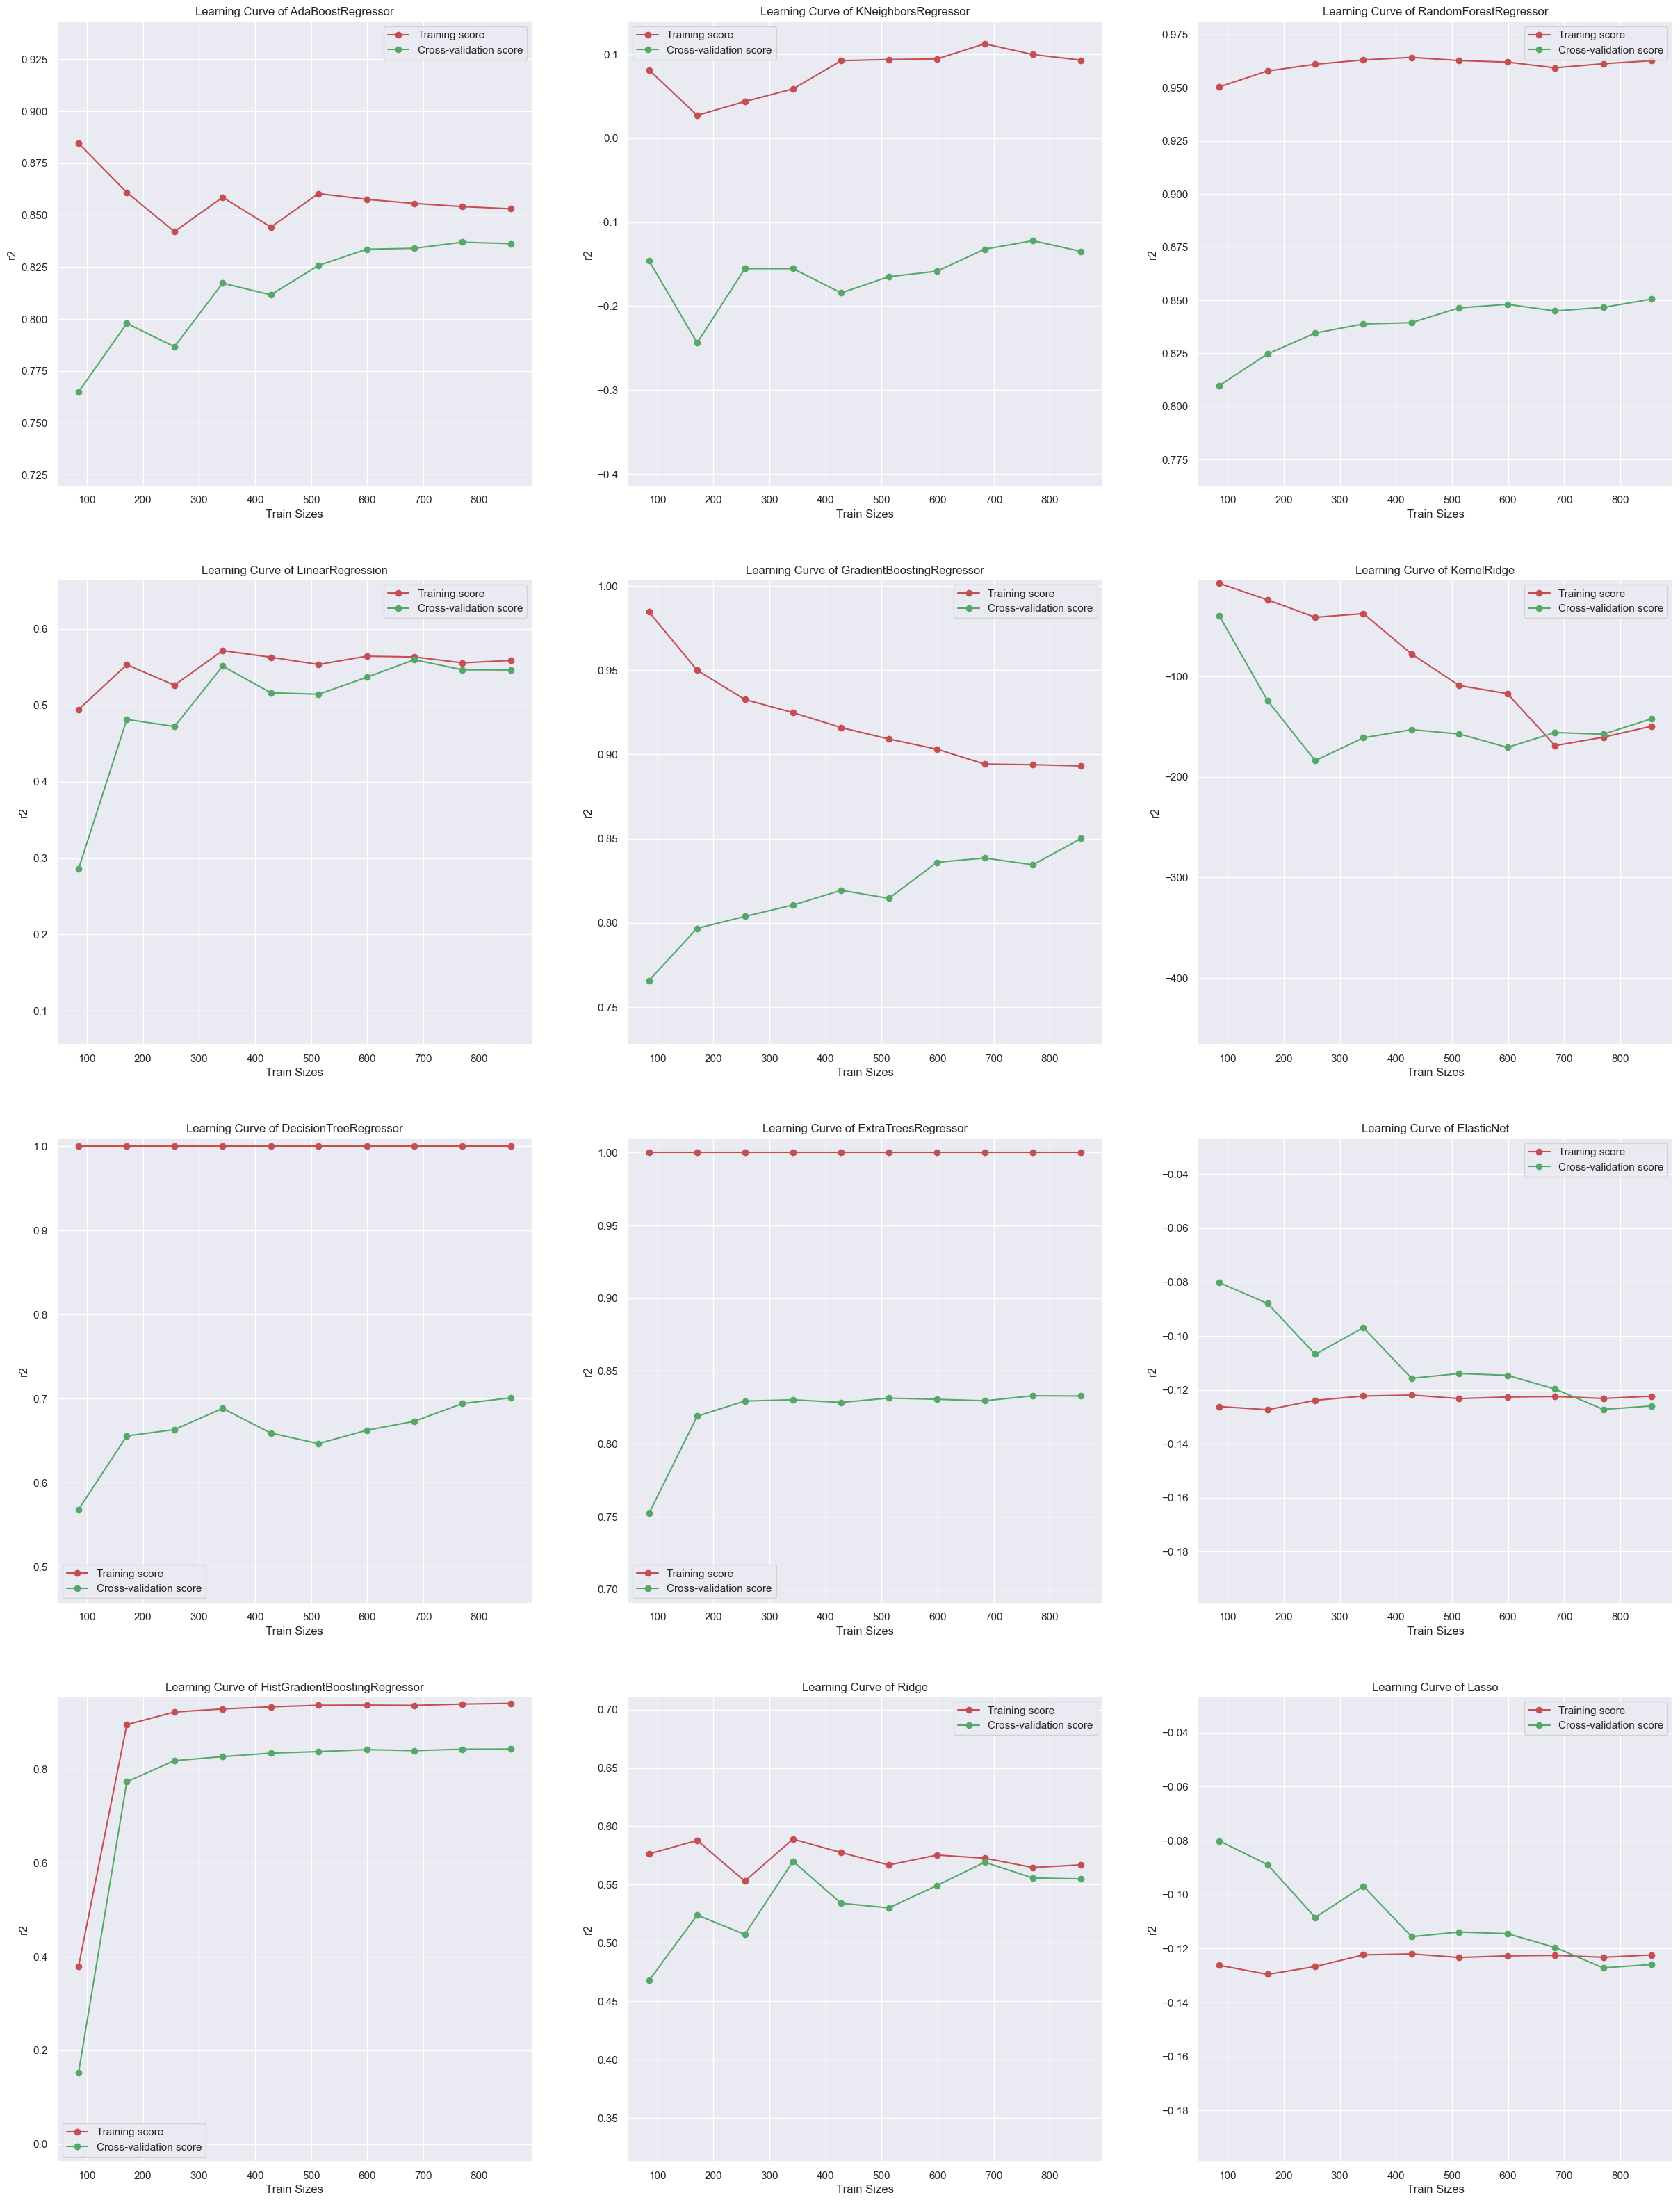

In [468]:
# Comparing the 12 learning curves
fig, ax = plt.subplots(4, 3, figsize=(30, 40))

model_scores = select_model(X_train, y_train, models, scoring_metrics, ax)
plt.show()

### Create the table of scores

In [469]:
# Accessing the scorings
model_scores.style.apply(
    lambda x: ["background-color: red; color: white" if v else "" for v in x == x.min()]
).apply(
    lambda x: [
        "background-color: green; color: white" if v else "" for v in x == x.max()
    ]
)

,fit_time,score_time,test_r2,train_r2,test_neg_mean_absolute_percentage_error,train_neg_mean_absolute_percentage_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error
GradientBoostingRegressor,0.191815,0.012488,0.849625,0.893149,-0.210173,-0.161957,-4550.248283,-3856.409091
RandomForestRegressor,0.553134,0.035821,0.848898,0.962323,-0.237488,-0.088337,-4565.896198,-2289.754798
HistGradientBoostingRegressor,0.687106,0.023604,0.843637,0.941193,-0.244804,-0.121569,-4643.342260,-2860.188885
AdaBoostRegressor,0.076013,0.019393,0.841943,0.857821,-0.426342,-0.411595,-4668.626321,-4448.414224
ExtraTreesRegressor,0.301220,0.024842,0.829787,1.000000,-0.290061,-0.000000,-4828.818866,-0.000000
DecisionTreeRegressor,0.020704,0.010326,0.708044,1.000000,-0.468773,-0.000000,-6332.770503,-0.000000
Ridge,0.032437,0.016345,0.554868,0.566943,-0.293058,-0.288171,-7837.341329,-7763.899009
LinearRegression,0.032055,0.016467,0.546170,0.558655,-0.293093,-0.288273,-7911.571725,-7837.807618
Lasso,0.017817,0.010742,-0.125899,-0.122371,-0.946075,-0.942971,-12490.949040,-12499.703405
ElasticNet,0.019262,0.009949,-0.126002,-0.122353,-0.946187,-0.942954,-12491.532129,-12499.603861


<u>Observation</u><br>
As we can see from the table, we have a outstanding model which performs well in multiple scoring metrics which is Gradient Boosting Regressor, it scored 0.85, -0.21, -4550 for r2, MAPE and RMSE respectively which is the best score for all 3 columns

<u>Baseline Dummy scoring for r2, MAPE and RMSE:</u> -0.01, -1.462168, -11787

Given the performance gap between the Gradient Boosting Regressor and the baseline Dummy model, we have a robust model to work with. For further analysis, we will focus on fine-tuning this model and compare it against the Dummy model for a evaluation.

Moreover, the learning curve suggests a smooth convergence between cross-validation scores and training scores. This convergence indicates that the model is effectively learning from the training data without overfitting, improving its reliability.


## Hypertuning our models

Getting the list of parameters

In [470]:
list(GradientBoostingRegressor().get_params().keys())

['alpha',
 'ccp_alpha',
 'criterion',
 'init',
 'learning_rate',
 'loss',
 'max_depth',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'min_samples_leaf',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'n_estimators',
 'n_iter_no_change',
 'random_state',
 'subsample',
 'tol',
 'validation_fraction',
 'verbose',
 'warm_start']

In [519]:
# GradientBoostingRegressor Hypertune
param_grid = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
    'regressor__max_depth': [3, 4, 5, 6, 7]
}

# Setting up the Pipeline
steps[STEPS_LEN] = (
    "hyper", GridSearchCV(
        TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=42),
            func=np.log1p,
            inverse_func=np.expm1,
        ),
        param_grid,
        cv=5,
        n_jobs=-1,
        verbose=1,
        scoring="r2"
    )
)

# fit model
gbr_search = Pipeline(steps=steps)
gbr_search.fit(X_train, y_train)

print(gbr_search["hyper"].best_estimator_)
print(gbr_search["hyper"].best_params_)
print(gbr_search["hyper"].best_score_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=GradientBoostingRegressor(learning_rate=0.01,
                                                               n_estimators=500,
                                                               random_state=42))
{'regressor__learning_rate': 0.01, 'regressor__max_depth': 3, 'regressor__n_estimators': 500}
0.8551418678644115


Initiallizing our model with best hyperparameters from hyper tuning

In [522]:
gbr_tuned = gbr_search["hyper"].best_estimator_
gbr_untuned = TransformedTargetRegressor(
            regressor=GradientBoostingRegressor(random_state=42),
            func=np.log1p,
            inverse_func=np.expm1,
        )

dummy = TransformedTargetRegressor(
            regressor=DummyRegressor(),
            func=np.log1p,
            inverse_func=np.expm1,
        )

Fitting the train data into the model

In [523]:
# GBR TUNED
steps[STEPS_LEN] = ("model", gbr_tuned)
gbr_tuned_model = Pipeline(steps=steps)
gbr_tuned_model.fit(X_train, y_train)

# GBR UNTUNED
steps[STEPS_LEN] = ("model", gbr_untuned)
gbr_untuned_model = Pipeline(steps=steps)
gbr_untuned_model.fit(X_train, y_train)

# DUMMY MODEL
steps[STEPS_LEN] = ("model", dummy)
dummy_model = Pipeline(steps=steps)
dummy_model.fit(X_train, y_train)


Pipeline(steps=[('ageGrp',
                 FunctionTransformer(func=<function ageGroup at 0x000001D6E30C94E0>)),
                ('BMIGrp',
                 FunctionTransformer(func=<function bmiGroup at 0x000001D6EB1B5760>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Smoker', 'AgeGrp',
                                                   'BMIGrp', 'Region']),
                                                 ('scale',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'BMI'])])),
                ('model',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=DummyRegressor()))])

Predicting Score with Our Model

In [524]:
gb_y_pred = gbr_tuned_model.predict(X_test)
gb_untuned_y_pred = gbr_untuned_model.predict(X_test)
dummy_y_pred = dummy_model.predict(X_test)

In [533]:
scores_data = {
    'Model': ['Gradient Boosting Regressor', 'Dummy Regressor', 'Gradient Boosting Regressor Untuned'],
    'R2 Score': [r2_score(y_test, gb_y_pred), r2_score(y_test, dummy_y_pred), r2_score(y_test, gb_untuned_y_pred)],
    'RMSE Score': [mean_squared_error(y_test, gb_y_pred, squared=False), mean_squared_error(y_test, dummy_y_pred, squared=False), mean_squared_error(y_test, gb_untuned_y_pred, squared=False)],
    'MAE Score': [mean_absolute_error(y_test, gb_y_pred), mean_absolute_error(y_test, dummy_y_pred), mean_absolute_error(y_test, gb_untuned_y_pred)]
}

scores_df = pd.DataFrame(scores_data)

# Print the DataFrame
scores_df.set_index('Model', inplace=True)
scores_df

,R2 Score,RMSE Score,MAE Score
Model,,,
Gradient Boosting Regressor,0.839962,5261.467838,2555.092285
Dummy Regressor,-0.204991,14437.339914,9690.369294
Gradient Boosting Regressor Untuned,0.830466,5415.321840,2643.459097


In [ ]:
# Convert our Dataframe into a Series
y_test = y_test['Cost ($)']

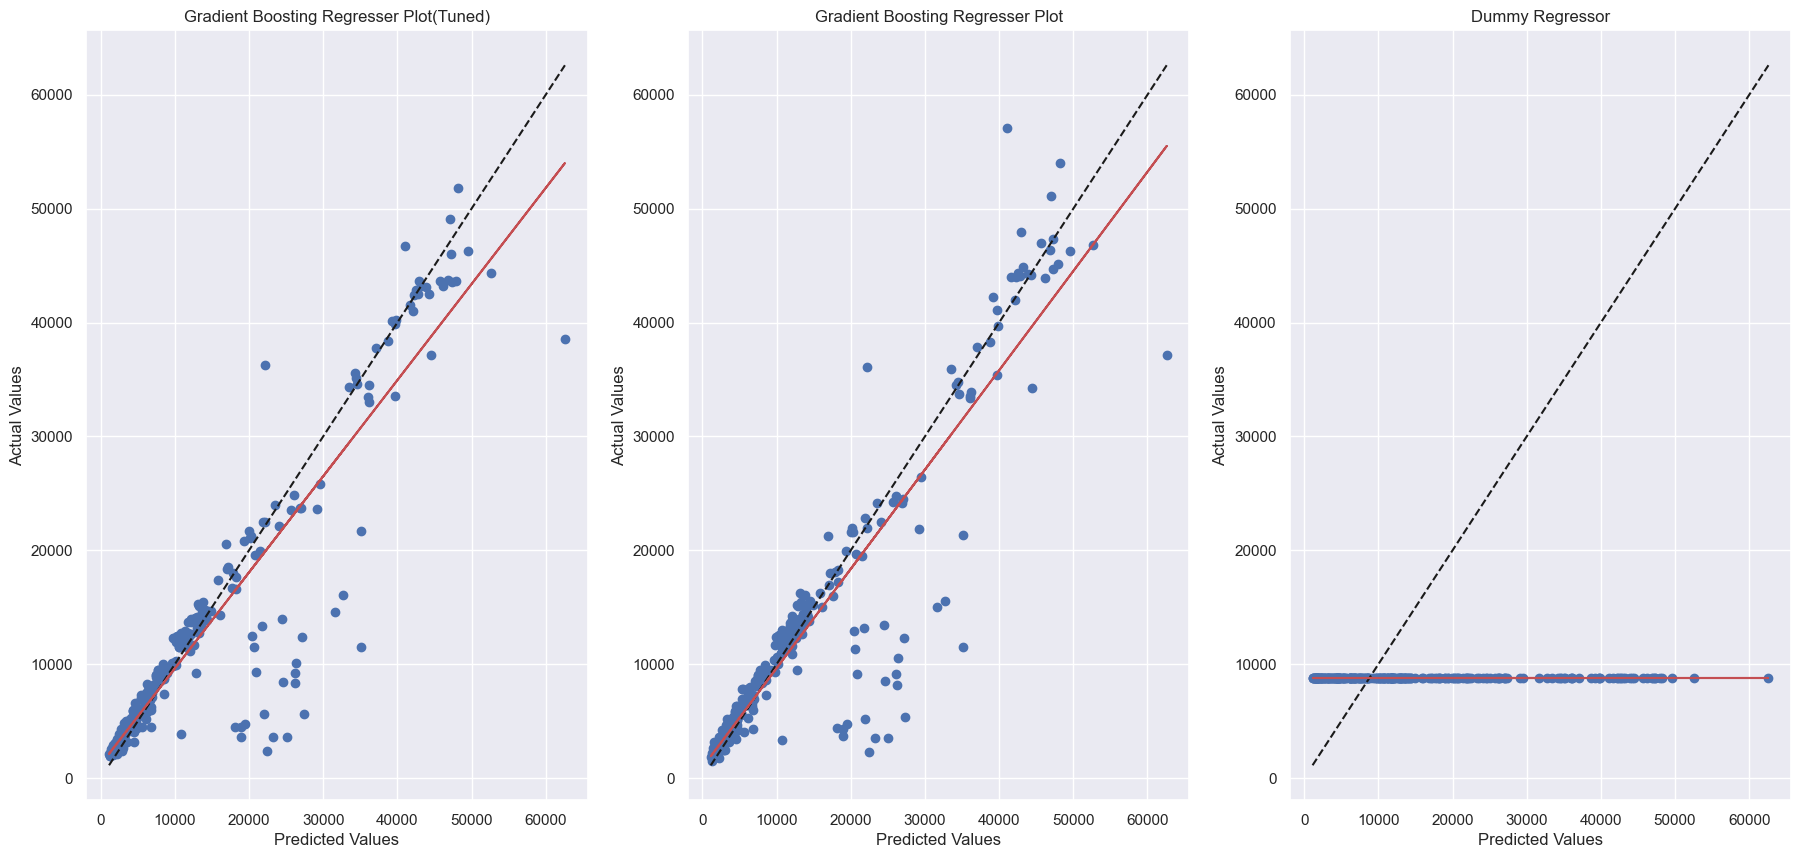

In [542]:
fig, ax = plt.subplots(1, 3, figsize=(22, 10))
ax[0].scatter(y_test, gb_y_pred)
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
m, b = np.polyfit(y_test, gb_y_pred, 1)
ax[0].plot(y_test, m*y_test + b, color='r')
ax[0].set_xlabel('Predicted Values')
ax[0].set_ylabel('Actual Values')
ax[0].set_title('Gradient Boosting Regresser Plot(Tuned)')

ax[1].scatter(y_test, gb_untuned_y_pred)
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
m, b = np.polyfit(y_test, gb_untuned_y_pred, 1)
ax[1].plot(y_test, m*y_test + b, color='r')
ax[1].set_xlabel('Predicted Values')
ax[1].set_ylabel('Actual Values')
ax[1].set_title('Gradient Boosting Regresser Plot')

ax[2].scatter(y_test, dummy_y_pred)
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--")
m, b = np.polyfit(y_test, dummy_y_pred, 1)
ax[2].plot(y_test, m*y_test + b, color='r')
ax[2].set_xlabel('Predicted Values')
ax[2].set_ylabel('Actual Values')
ax[2].set_title('Dummy Regressor')
plt.show()


### Regression Model Plots<br>
The scatter plots depict the relationship between the predicted values and the actual values for three different regression models.

### Gradient Boosting Regressor (Tuned)<br>
Points are scattered around a line, indicating the predicted values are close to the actual values. The red line represents the regression line, and the predicted values align closely with this line. This suggests that the tuned Gradient Boosting Regressor is performing well in capturing the underlying patterns in the data.

### Gradient Boosting Regressor (Untuned)<br>
Similar to the tuned model, points are scattered around a line, but the alignment with the regression line may not be as tight. While still capturing the overall trend, the untuned model might exhibit more variability in its predictions compared to the tuned version.

### Dummy Regressor<br>
The scatter plot for the Dummy Regressor shows a less organized pattern, with predicted values consistently around 10, 000 along a horizontal line. This is expected, as the Dummy Regressor provides a baseline for comparison and doesn't capture the underlying patterns in the data as effectively.

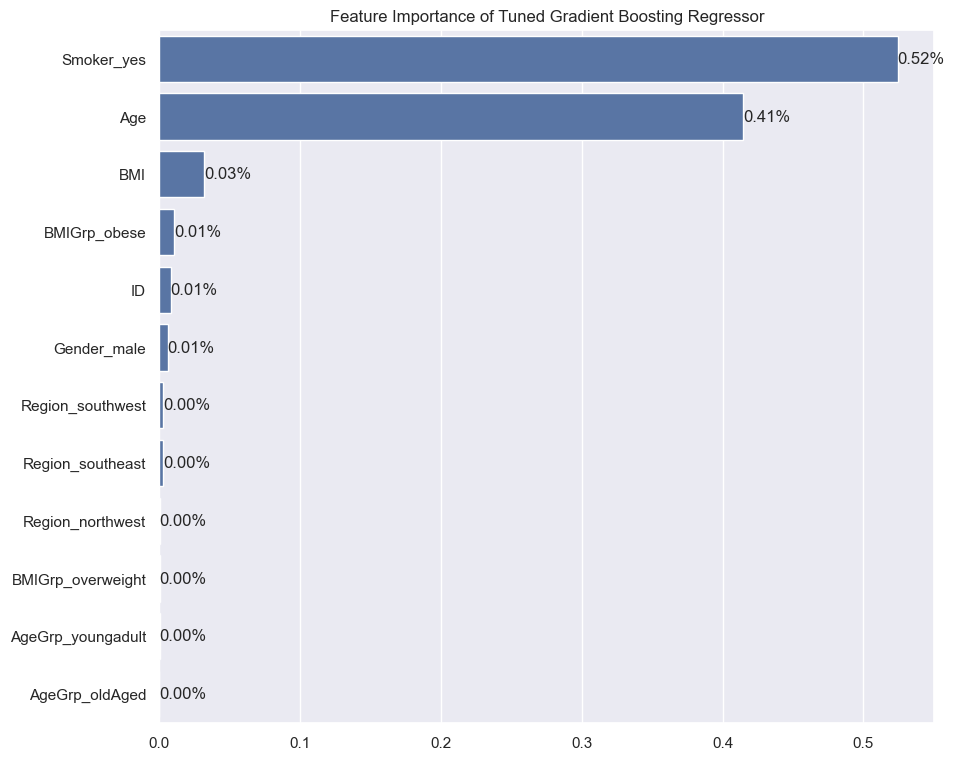

In [518]:
# Calculating Feature Importance
importance = pd.Series(gbr_tuned_model[-1].regressor_.feature_importances_, index=X_col).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 9))
sns.barplot(
    x=importance[importance > 0].values, 
    y=importance[importance > 0].index,  
    ax=ax,
    color="b" 
)
ax.set_title("Feature Importance of Tuned Gradient Boosting Regressor")
for i in ax.containers:
    ax.bar_label(i, fmt = '%.2f%%')

# Show plot
plt.show()